In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
twitter_data = pd.read_json('tweets_msft_mod.json', orient='split')
stock_data = pd.read_json('MSFT-19.json')

In [3]:
print(twitter_data.columns)
print(len(twitter_data))
print(stock_data.columns)
print(len(stock_data))

twitter_dataMod = twitter_data.drop(twitter_data.index[[120,121,122,123,124,125,126,127]])
print(len(twitter_dataMod))

Index(['dates', 'vader_mean', 'vader_std', 'volume', 'mean_exist',
       'std_exist'],
      dtype='object')
128
Index(['APO', 'Aroon Down', 'Real Middle Band', 'MIDPOINT', 'OBV', 'SINE',
       'QUADRATURE', 'open', 'close'],
      dtype='object')
120
120


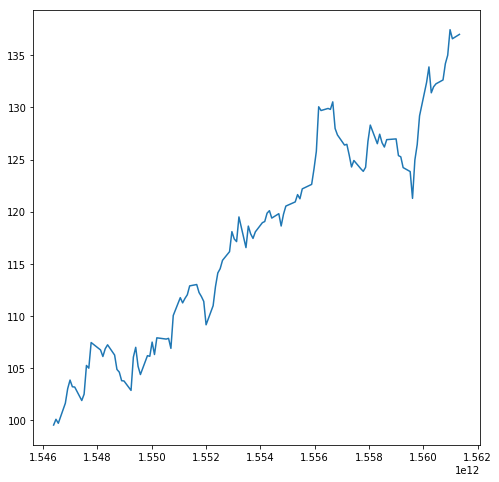

In [4]:
plt.figure(figsize=(8, 8))
plt.plot(twitter_dataMod.get('dates'), stock_data.get('open'))

In [5]:
# Shift the data to enable one-step t + 1 prediction

# Build the x and y values, note: x includes the previous opening price and closing prices

LAG_STEPS = 3 # Counted not including implied lag step of 1

dataLength = len(twitter_dataMod)-1

#twitter_dataMod2 = twitter_dataMod.drop(twitter_dataMod.index[[np.array(range(LAG_STEPS)), 
#                                                               dataLength-np.array(range(LAG_STEPS))]])
#stock_dataMod = stock_data.drop(stock_data.index[[np.array(range(LAG_STEPS)), 
#                                                               dataLength-np.array(range(LAG_STEPS))]])
#stock_dataMod2 = stock_data.drop(stock_data.index[np.array(range(LAG_STEPS*2))])
twitter_dataMod2 = twitter_dataMod.to_numpy()
twitter_dataMod2 = np.delete(twitter_dataMod2, 0, axis = 1)

stock_dataMod = stock_data.to_numpy()
stock_dataMod = np.delete(stock_dataMod, [7,8], axis = 1)

stock_dataMod2 = stock_data.to_numpy()
stock_dataMod2 = np.delete(stock_dataMod2, range(7), axis = 1)


for i in range(LAG_STEPS, dataLength):
    temp_twitter = (twitter_dataMod2[i - np.array(range(LAG_STEPS))]).reshape(1,-1)
    temp_stock = (stock_dataMod[i - np.array(range(LAG_STEPS))]).reshape(1,-1)
    temp_stock2 = (stock_dataMod[i - np.array(range(1, 1+LAG_STEPS))]).reshape(1,-1)
    if i == LAG_STEPS:
        x_unscaled = np.concatenate((temp_twitter, temp_stock, temp_stock2), axis = 1)
    else:
        temp_arr = np.concatenate((temp_twitter, temp_stock, temp_stock2), axis = 1)
        x_unscaled = np.concatenate((x_unscaled, temp_arr), axis = 0)

#twitter_dataMod2 = twitter_dataMod.to_numpy()
#twitter_dataMod2 = np.delete(twitter_dataMod2, 0, axis = 1)
#twitter_dataMod2 = np.delete(twitter_dataMod2, [np.array(range(LAG_STEPS)), dataLength-np.array(range(LAG_STEPS))], axis = 0)

#twitter_dataMod2 = twitter_dataMod.to_numpy()
#stock_dataMod = np.delete(stock_dataMod, [7,8], axis = 1)
#stock_dataMod = np.delete(stock_dataMod, [np.array(range(LAG_STEPS)), dataLength-np.array(range(LAG_STEPS))], axis = 0)

#stock_dataMod2 = stock_data.to_numpy()
#stock_dataMod2 = np.delete(stock_dataMod2, range(7), axis = 1)
#stock_dataMod2 = np.delete(stock_dataMod2, range(LAG_STEPS*2), axis = 0)

#x = np.vstack((twitter_dataMod2.get('vader_mean'), twitter_dataMod2.get('vader_std'), 
#          twitter_dataMod2.get('volume'), twitter_dataMod2.get('mean_exist'),
#          twitter_dataMod2.get('std_exist'))).T

#x2 = np.vstack((temp_stockMod[:, 0], temp_stockMod[:, 1], temp_stockMod[:, 2], 
#          temp_stockMod[:, 3], temp_stockMod[:, 4], temp_stockMod[:, 5],
#          temp_stockMod[:, 6], temp_stockMod2[:, 7], temp_stockMod2[:, 8])).T

#x_unscaled = np.concatenate((x, x2), axis=1)


#twitter_dataMod2 = twitter_dataMod.drop(twitter_dataMod.index[[0, 119]])
#stock_dataMod = stock_data.drop(stock_data.index[[0, 119]]).to_numpy()
#stock_dataMod2 = stock_data.drop(stock_data.index[[118, 119]]).to_numpy()

print(len(x_unscaled))
print(x_unscaled[0])

stock_dataMod3 = stock_data.drop(stock_data.index[range(LAG_STEPS+1)]).to_numpy()

y_open = stock_dataMod3[:, 7].reshape(-1,1)
y_close = stock_dataMod3[:, 8].reshape(-1,1)
print(y_open.size)

116
[ 3.32594737e-01  3.91283676e-01  3.80000000e+01  1.00000000e+00
  1.00000000e+00  3.88791837e-01  3.32781913e-01  4.90000000e+01
  1.00000000e+00  1.00000000e+00  2.17464286e-01  4.55393854e-01
  2.80000000e+01  1.00000000e+00  1.00000000e+00 -4.14660000e+00
  8.83333000e+01  1.07714300e+02  1.05695000e+02 -1.18944652e+09
  2.91100000e-01  5.37500000e+00 -4.19940000e+00  9.00000000e+01
  1.07877800e+02  1.05695000e+02 -1.22510266e+09  1.89000000e-01
  7.48780000e+00 -4.08360000e+00  9.16667000e+01  1.08036500e+02
  1.05695000e+02 -1.26916328e+09  1.15400000e-01  4.56650000e+00
 -4.19940000e+00  9.00000000e+01  1.07877800e+02  1.05695000e+02
 -1.22510266e+09  1.89000000e-01  7.48780000e+00 -4.08360000e+00
  9.16667000e+01  1.08036500e+02  1.05695000e+02 -1.26916328e+09
  1.15400000e-01  4.56650000e+00 -3.46680000e+00  9.33333000e+01
  1.08252900e+02  1.05695000e+02 -1.22658487e+09  2.17000000e-02
 -1.61150000e+00]
116


In [6]:
# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy = True, with_mean = True, with_std = True)
scaler.fit(x_unscaled)
x = (scaler.transform(x_unscaled))
# import the splitting library
from sklearn.model_selection import train_test_split

0.9811990089817088
0.9656494072524948


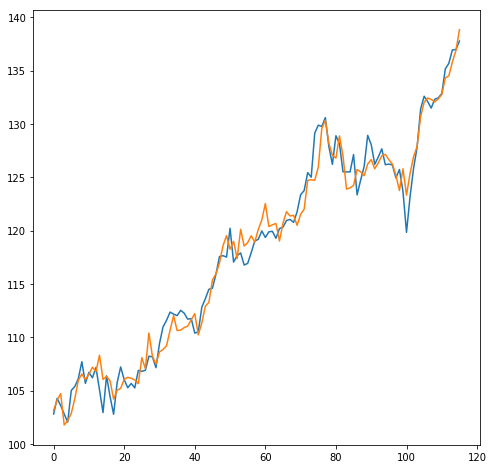

In [7]:
# basic linear regression
from sklearn import linear_model
x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)
reg = linear_model.LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

1.0
0.9768001530156022
0.9643961905039031


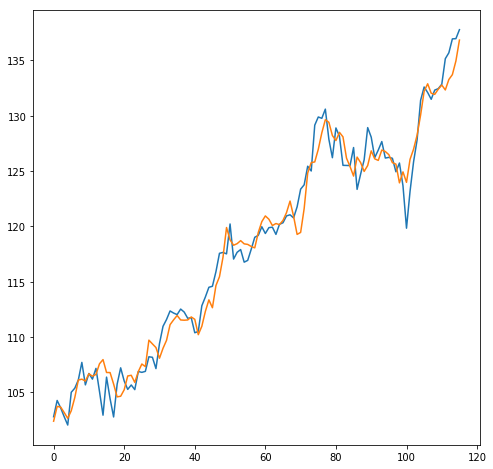

In [8]:
# ridge regression
x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)
reg = linear_model.RidgeCV(alphas = np.logspace(-4, 4, 9), fit_intercept = True)
reg.fit(x_train, y_train)
print(reg.alpha_)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

0.9578890893684386
0.9576930049189896


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 3 iterations, i.e. alpha=2.326e-01, with an active set of 3 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 4 iterations, i.e. alpha=1.163e-01, with an active set of 4 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 5 iterations, i.e. alpha=5.771e-02, with an active set of 5 regressors, and the smallest cholesky pivot

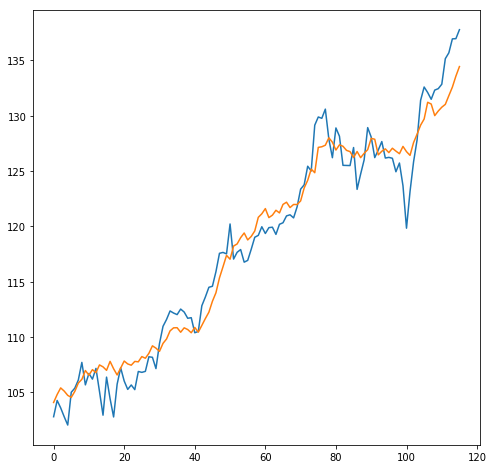

In [9]:
# lasso regression (LARS)
x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)
reg = linear_model.LassoLars(alpha = 0.01, fit_path = True, fit_intercept = True, precompute = 'auto', max_iter = 10)

reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0
0.0


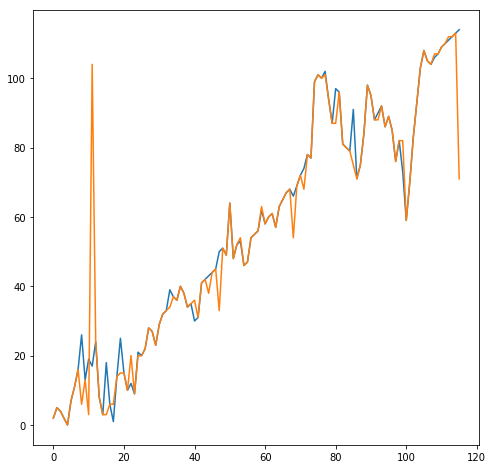

In [10]:
# Logistic regression
from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(np.ravel(y_close))

x_train, x_test, y_train, y_test = train_test_split(x, encoded, test_size = 0.20)
reg = linear_model.LogisticRegression().fit(x_train, np.ravel(y_train))
print(reg.score(x_train, np.ravel(y_train)))
print(reg.score(x_test, np.ravel(y_test)))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), encoded)
plt.plot(range(len(x_unscaled)), reg.predict(x))

0.9810433638115714
0.8767236584691142


C:\Users\patel\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


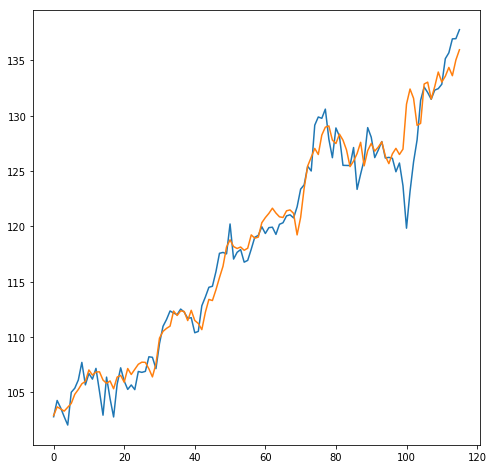

In [11]:
# Bayesian Ridge Regression
x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)
reg = linear_model.BayesianRidge(compute_score = True)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

1.0
0.9525966911318335


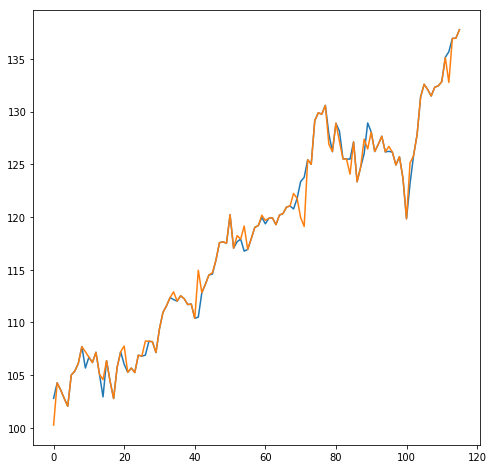

In [12]:
# Extend linear regression to polynomial 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)
reg = linear_model.LinearRegression().fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(z))

10.0
0.9997533831998732
0.9362993500237736


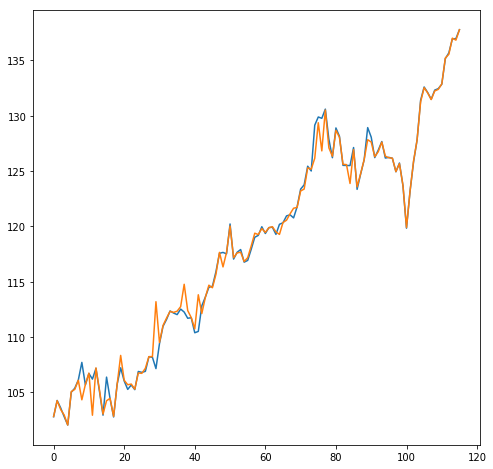

In [13]:
# Extend ridge regression to polynomial 

poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)
reg = linear_model.RidgeCV(alphas = np.logspace(-5, 5, 11), fit_intercept = True)
reg.fit(x_train, y_train)
print(reg.alpha_)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(z))

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 2 iterations, i.e. alpha=7.220e-01, with an active set of 2 regressors, and the smallest cholesky pivot element being 2.107e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


0.6970848840724895
0.7434397471761316


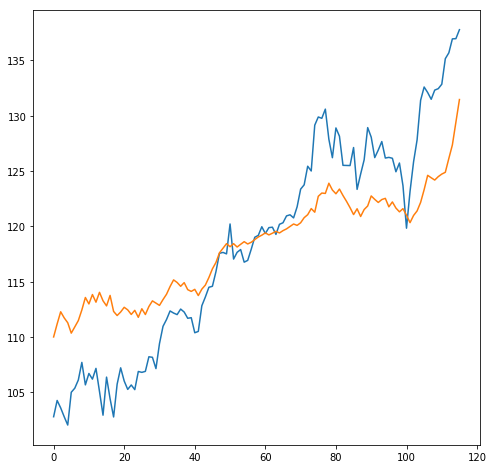

In [14]:
# Extend lasso regression to polynomial
poly = PolynomialFeatures(degree=4)
z = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)
reg = linear_model.LassoLars(alpha = 0.1, fit_intercept = True, precompute = 'auto',
                            fit_path = True, max_iter = 6)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(z))

C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\patel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0
0.0


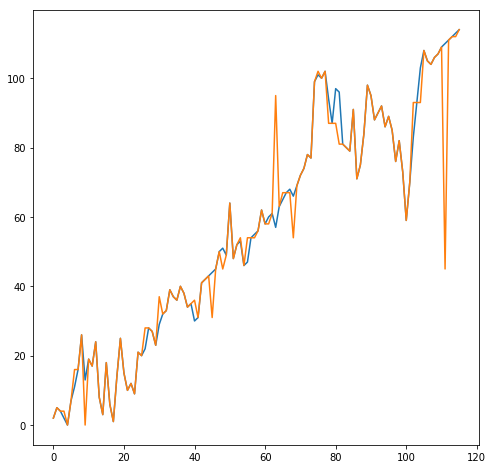

In [15]:
# extend logistic regression to polynomial
poly = PolynomialFeatures(degree=2)
z = poly.fit_transform(x)

from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(np.ravel(y_close))

x_train, x_test, y_train, y_test = train_test_split(z, encoded, test_size = 0.20)
reg = linear_model.LogisticRegression().fit(x_train, np.ravel(y_train))
print(reg.score(x_train, np.ravel(y_train)))
print(reg.score(x_test, np.ravel(y_test)))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), encoded)
plt.plot(range(len(x_unscaled)), reg.predict(z))

0.9999999999999872
0.9164278497419781


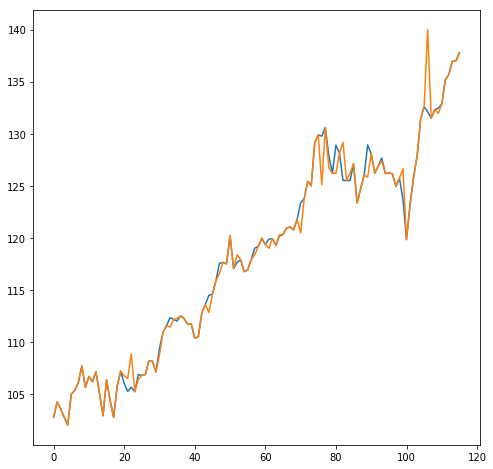

In [16]:
# extend bayesian regression to polynomial
poly = PolynomialFeatures(degree=3)
z = poly.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(z, y_close, test_size = 0.20)
reg = linear_model.BayesianRidge(compute_score = True)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(z))

0.9999787390379125
0.9487492721826524


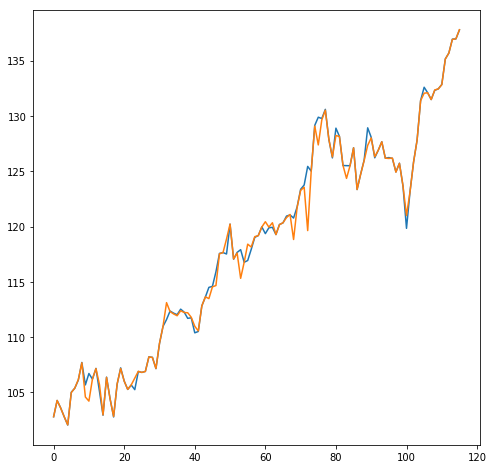

In [42]:
# Kernel ridge regression

from sklearn.kernel_ridge import KernelRidge

x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)
reg = KernelRidge(alpha=0.01, coef0=1, degree=3, kernel='poly')
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

0.9999000761264992
0.9583237303356346


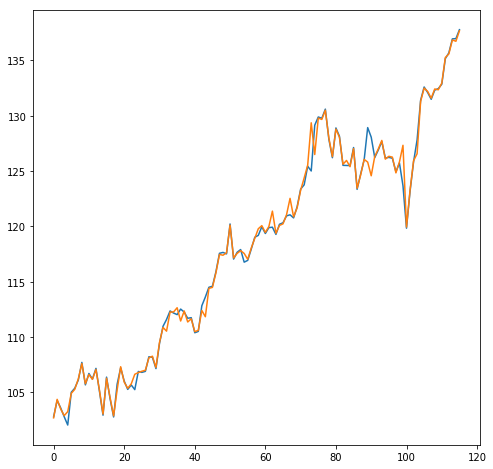

In [73]:
# Support Vector Regression
from sklearn.svm import SVR

x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

reg = SVR(kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

0.9999999982803296
0.9569008196886112


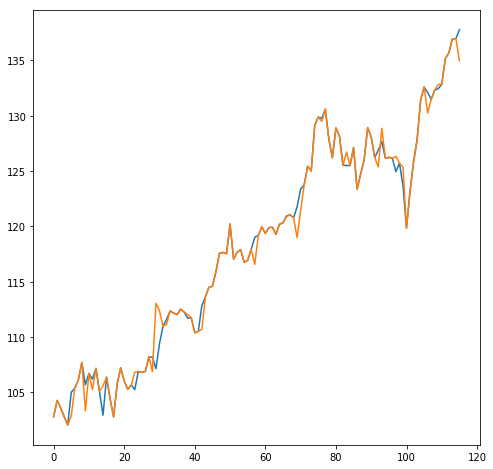

In [72]:
# Support Vector Regression
from sklearn.svm import NuSVR

x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

reg = NuSVR(nu = 0.9, kernel='rbf', max_iter=-1, gamma= 0.001, C = 10000)
reg.fit(x_train, np.ravel(y_train))
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

1.0
0.9487056355752036


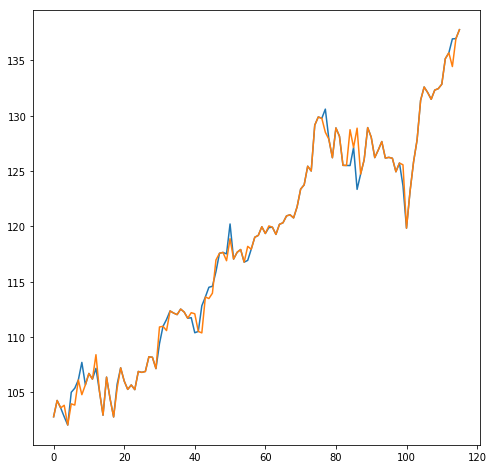

In [83]:
# Nearest Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

reg = KNeighborsRegressor(n_neighbors=4, weights = 'distance')
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))

1.0
-0.04503677444488341


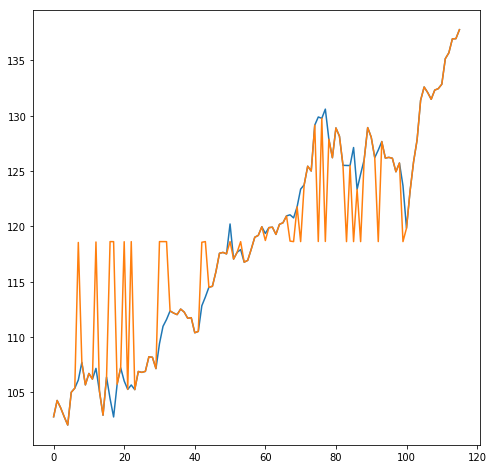

In [92]:
# Gaussian Process Regressor
from sklearn.gaussian_process import GaussianProcessRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y_close, test_size = 0.20)

reg = GaussianProcessRegressor(normalize_y = True, alpha = 1e-10)
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))
print(reg.score(x_test, y_test))
plt.figure(figsize=(8, 8))
plt.plot(range(len(x_unscaled)), y_close)
plt.plot(range(len(x_unscaled)), reg.predict(x))